<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyPARTICLE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>PARTICLE</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyPARTICLE.png"></td>
</tr>
</table>

----
# `pyPARTICLE`

pyPARTICLE, a program package for particle flow and transport.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Setup of particles

In this notebook, we will use `N` particles simultaneously, which are subject to
- diffusion (Brownian motion, simulated by random fluctiations)
- advection (as Couette flow)
- gravity (as Stokes flow)
- (reaction)

We will first set up a **model domain**:
- insert `Nfloat` floating particles with random locations, 
- attach `Nsettled` settled particles along the bottom,
- define the coordinate arrays `pX` and `pY`,
- define the particle state as array `pState` (0-settled,1-floating),
- define the particle material as array `pMaterial` (0-settled material, >0-floating material).

<img src='images/setup.jpg' style=height:80mm;>

In [11]:
def particleInit(Nfloat=50,Nsettled=10,**kwargs):
    """
    Particle motion
    input:
      Nfloat,Nsettled    - number of floating/settled particles
    **kwargs:
      sidex,sidey        - x- and y-dimension of box
      seedx,seedy        - center of floating particle cloud
      sigmax,sigmay      - standard deviation for random location
    output:
      pX,pY              - x- and y-coordinates of particles
      pState             - state of particles (0-settled,>0-floating)
      pMaterial          - material of particle
    """
    # default settings
    sidex  = 1.0; sidey  = 0.5
    seedx  = 0.5; seedy  = 0.4
    sigmax = 0.05; sigmay = 0.05
    # test for user settings
    print('User settings: ',kwargs)
    for i in kwargs:
        if (i=='sidex'): sidex = kwargs[i]
        if (i=='sidey'): sidey = kwargs[i]
        if (i=='seedx'): seedx = kwargs[i]
        if (i=='seedy'): seedy = kwargs[i]
        if (i=='sigmax'): sigmax = kwargs[i]
        if (i=='sigmay'): sigmay = kwargs[i]
    # total number of particles
    N = Nfloat + Nsettled
    # random location for floating particles
    rng    = np.random.default_rng(seed=12)
    pX     = rng.uniform(seedx-sigmax,seedx+sigmax,Nfloat)
    pY     = rng.uniform(seedy-sigmay,seedy+sigmay,Nfloat)
    pState    = np.ones(Nfloat,dtype='int')
    pMaterial = np.ones(Nfloat,dtype='int')
    # set coordinates of settled particles
    pX = np.append(pX,np.linspace(0,sidex,Nsettled),axis=0)
    pY = np.append(pY,np.zeros(Nsettled),axis=0)
    pState    = np.append(pState,np.zeros(Nsettled),axis=0)
    pMaterial = np.append(pMaterial,np.zeros(Nsettled),axis=0)
    return pX,pY,pState,pMaterial

In [12]:
pX,pY,pState,pMaterial = particleInit()

User settings:  {}


----
## Plot

Next, we create a plotting function for the initial setup:

In [13]:
def particlePlot(pX,pY,pState,pMaterial,show=False,time=0,isaved=0,**kwargs):
    """
    Particle motion
    input:
      pX,pY              - x- and y-coordinates of particles
      pState             - state of particles (0-settled,>0-floating)
      pMaterial          - material of particle
    **kwargs:
      sidex,sidey        - x- and y-dimension of box
      path               - path for figure and data files
      name               - name of model
    output:
      (to figure)
    """
    # default settings
    sidex  = 1.0; sidey  = 0.5
    path  = 'div/test1'
    name  = 'test1'
    # test for user settings
    for i in kwargs:
        if (i=='sidex'): sidex = kwargs[i]
        if (i=='sidey'): sidey = kwargs[i]
        if (i=='path'):  path = kwargs[i]
        if (i=='name'):  name = kwargs[i]
    # check for directory for plotting
    if not os.path.isdir(path):
        os.mkdir(path)
    # plot
    offsetx = 0.1*sidex; offsety = 0.1*sidey
    filename = name+f"-{isaved:04}.png"
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax.set_title('time: '+str(round(time,2)))
    ax.set_xlim([0-offsetx,sidex+offsetx])
    ax.set_ylim([0-offsety,sidey+offsety])
    ax.set_aspect('equal', 'box')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.scatter(pX,pY,lw=0,marker='o',cmap='tab20',s=10,c=pMaterial)
    plt.savefig(path+'/'+filename)
    if (not show):
        plt.close()
    return

Test for standard setup ...

User settings:  {}


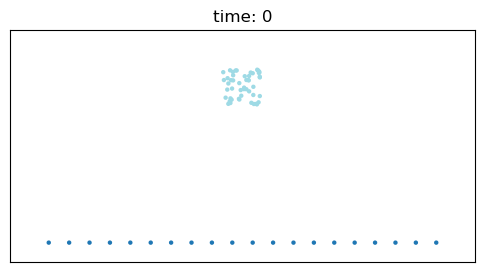

In [14]:
pX,pY,pState,pMaterial = particleInit(Nfloat=50,Nsettled=20)
particlePlot(pX,pY,pState,pMaterial,show=True)

Test for user-defined setup ...

User settings:  {'sidex': 0.5, 'sidey': 0.1, 'seedx': 0.15, 'seedy': 0.08, 'sigmax': 0.02, 'sigmay': 0.01}


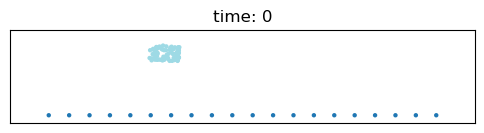

In [15]:
sidex=0.5; sidey=0.1
seedx=0.15;seedy=0.08
sigmax=0.02;sigmay=0.01

pX,pY,pState,pMaterial = particleInit(Nfloat=80,Nsettled=20,sidex=sidex,sidey=sidey,
                                   seedx=seedx,seedy=seedy,sigmax=sigmax,sigmay=sigmay)
particlePlot(pX,pY,pState,pMaterial,show=True,sidex=sidex,sidey=sidey)

----